<a href="https://colab.research.google.com/github/BillWorstell/derenzo_phantom/blob/master/iDerenzo_3D_DiffDRR.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Generate 3D homogeneous projections from (Euclidean) volume images of a derenzo_phantom

In [1]:
import torch
import matplotlib.pyplot as plt
import numpy as np
!pip install icecream
from icecream import ic

# Load data

#Mount google drive and connect to output data path

In [2]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


##Load translations and rotations of phantom

In [3]:
RunTranslate=np.load('/content/gdrive/MyDrive/data/derenzo_phantom/RunTranslate.npy')
ic(RunTranslate.shape)
NRuns=RunTranslate.shape[0]
ic(NRuns)

RunRotate=np.load('/content/gdrive/MyDrive/data/derenzo_phantom/RunRotate.npy')
ic(RunRotate.shape)
NRuns=RunRotate.shape[0]
ic(NRuns)

ic| RunTranslate.shape: (1, 3)
ic| NRuns: 1
ic| RunRotate.shape: (1, 3)
ic| NRuns: 1


1

##Load ground truth volumes orthogonal projections

ic| iEvent: 0


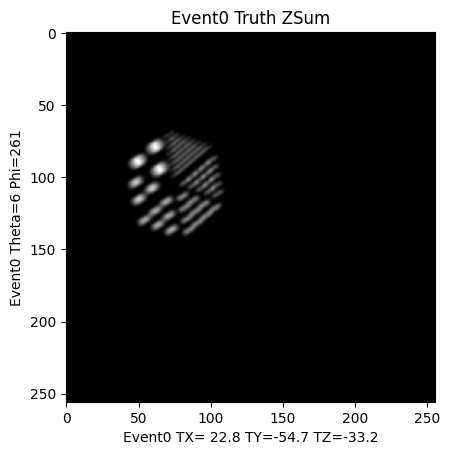

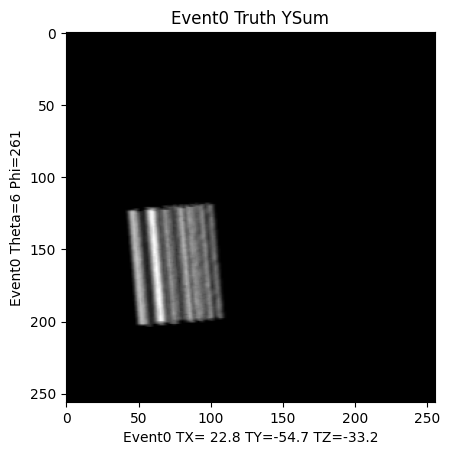

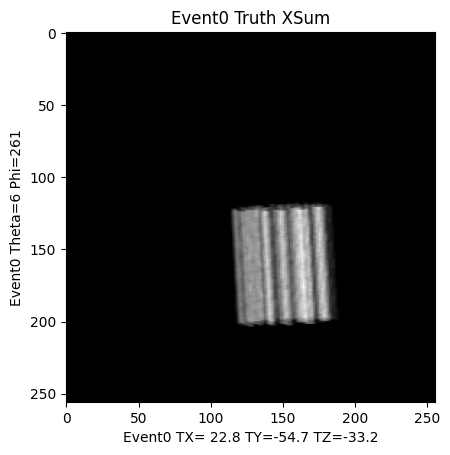

In [4]:
NEvents=1

for iEvent in range(0,NEvents):
  ic(iEvent)
  thisTruth=torch.load(f'/content/gdrive/MyDrive/data/derenzo_phantom/truth_{iEvent}.pt')
  Truth=thisTruth.numpy()
  Truth_Mod0_ZSum=torch.sum(thisTruth,dim=3).numpy()
  Truth_Mod0_YSum=torch.sum(thisTruth,dim=2).numpy()
  Truth_Mod0_XSum=torch.sum(thisTruth,dim=1).numpy()

  TX=RunTranslate[iEvent,0]
  TY=RunTranslate[iEvent,1]
  TZ=RunTranslate[iEvent,2]
  PsiDeg=(180./np.pi)*RunRotate[iEvent,0]
  ThetaDeg=(180./np.pi)*RunRotate[iEvent,1]
  PhiDeg=(180./np.pi)*RunRotate[iEvent,2]

  plt.imshow(np.flipud(Truth_Mod0_ZSum.T),cmap='gray')
  plt.title(f'Event{iEvent} Truth ZSum')
  plt.xlabel(f'Event{iEvent} TX={TX:5.1f} TY={TY:5.1f} TZ={TZ:5.1f}')
  plt.ylabel(f'Event{iEvent} Theta={ThetaDeg:.0f} Phi={PhiDeg:.0f}')
  plt.show()

  plt.imshow(np.flipud(Truth_Mod0_YSum.T),cmap='gray')
  plt.title(f'Event{iEvent} Truth YSum')
  plt.xlabel(f'Event{iEvent} TX={TX:5.1f} TY={TY:5.1f} TZ={TZ:5.1f}')
  plt.ylabel(f'Event{iEvent} Theta={ThetaDeg:.0f} Phi={PhiDeg:.0f}')
  plt.show()

  plt.imshow(np.flipud(Truth_Mod0_XSum.T),cmap='gray')
  plt.title(f'Event{iEvent} Truth XSum')
  plt.xlabel(f'Event{iEvent} TX={TX:5.1f} TY={TY:5.1f} TZ={TZ:5.1f}')
  plt.ylabel(f'Event{iEvent} Theta={ThetaDeg:.0f} Phi={PhiDeg:.0f}')
  plt.show()


ic| iEvent: 0
ic| thisProjections.shape: torch.Size([1, 96, 256, 256])
ic| Projections_Mod0.shape: (256, 256)


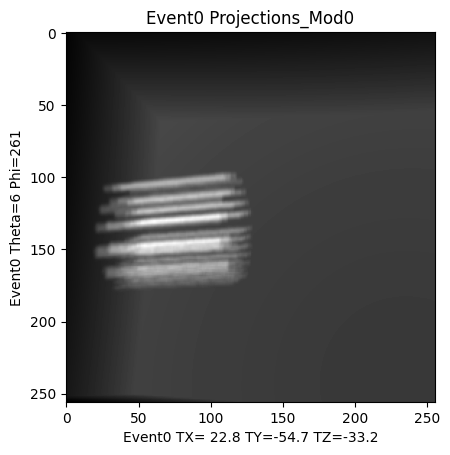

In [5]:
for iEvent in range(0,NEvents):
  ic(iEvent)
  thisProjections=torch.load(f'/content/gdrive/MyDrive/data/derenzo_phantom/Projections_{iEvent}.pt')
  ic(thisProjections.shape)

  Projections_Mod0=np.squeeze(thisProjections[:,0,:,:].numpy())
  ic(Projections_Mod0.shape)

  plt.imshow(np.flipud(Projections_Mod0.T),cmap='gray')
  plt.title(f'Event{iEvent} Projections_Mod0')
  plt.xlabel(f'Event{iEvent} TX={TX:5.1f} TY={TY:5.1f} TZ={TZ:5.1f}')
  plt.ylabel(f'Event{iEvent} Theta={ThetaDeg:.0f} Phi={PhiDeg:.0f}')
  plt.show()


#Get Multi-pinhole SPECT System Geometry

In [6]:
from google.colab import drive
drive.mount('/content/drive')
path = '/content/drive/MyDrive/SPECTGeometry/'

Mounted at /content/drive


In [7]:
!ls -ltr /content/drive/MyDrive/SPECTGeometry/

total 1223
-rw------- 1 root root 461819 Dec 19 14:27 MDSL.excel80M10RFR.cut-plate.007.150roi.2.30pin.105ellipse.fix.xlsx
-rw------- 1 root root 790185 Dec 22 19:19 MDSL.excel80M10RFR.cut-plate.008.150roi.2.30pin.105ellipse.xlsx


Install openpyxl using pip

In [8]:
pip install openpyxl

https://openpyxl.readthedocs.io/en/stable/tutorial.html#loading-from-a-file

In [9]:
from openpyxl import load_workbook
wb = load_workbook(filename = '/content/drive/MyDrive/SPECTGeometry/MDSL.excel80M10RFR.cut-plate.008.150roi.2.30pin.105ellipse.xlsx',data_only=True)

loop through worksheets

In [10]:
for sheet in wb:
...     print(sheet.title)

Main
Coordinates
MDSL cloud import
Theta
Values
Design Table


Go to Coordinates Worksheet

In [11]:
wb.active = 1
print(wb.active.title)
ws = wb.active

Coordinates


X,Y,Z Coordinates at the center of each pinhole

In [12]:
ic(ws.cell(2,7).value)
XP=np.zeros(80)
YP=np.zeros(80)
ZP=np.zeros(80)
for i in range(3,83):
  XP[i-3]=(ws.cell(i,2).value)
  YP[i-3]=(ws.cell(i,3).value)
  ZP[i-3]=(ws.cell(i,4).value)

ic(XP[0])
ic(YP[0])
ic(ZP[0])

ic| ws.cell(2,7).value: 'length of collimator'
ic| XP[0]: 277.002
ic| YP[0]: 70.37124
ic| ZP[0]: -70.0363


-70.0363

Length of Collimator

In [13]:
ic(ws.cell(2,7).value)
lcoll=np.zeros(80)
for i in range(3,83):
  lcoll[i-3]=(ws.cell(i,7).value)

ic| ws.cell(2,7).value: 'length of collimator'


Choose vsdr = 5 * length of collimator, so by similar triangles

(2*5*lcoll)=source to virtual detector, or 10X

source to virtual detector is 10X size of actual detector

Size of detector at end of collimator is ~50mm

This implies dx * NX = 10 * 50mm ~ 500mm

dx ~ 500/256 ~2mm

    height=256,  # Height of the DRR (if width is not seperately provided, the generated image is square)
    delx=1.0,  # Pixel spacing (in mm)


In [14]:
vsdr=5.*lcoll

alpha: Azimuthal angle (radians)

In [15]:
ic(ws.cell(2,22).value)
alpha=np.zeros(80)
for i in range(3,83):
  alpha[i-3]=(ws.cell(i,22).value)

ic| ws.cell(2,22).value: 'pinhole azimuth (radians)'


beta = altitude (radians)

In [16]:
ic(ws.cell(2,23).value)
beta=np.zeros(80)
for i in range(3,83):
  beta[i-3]=(ws.cell(i,23).value)

ic| ws.cell(2,23).value: 'pinhole elevation (radians)'


#make meshgrid from volume and spacing

In [17]:
#volume, spacing = load_example_ct()
volume=np.zeros([256,256,256])
spacing=[1.0, 1.0, 1.0]
bx, by, bz = torch.tensor(volume.shape) * torch.tensor(spacing) / 2
ic(bx, by, bz)
ic(volume.shape)
ic(spacing)

ic| bx: tensor(128.), by: tensor(128.), bz: tensor(128.)
ic| volume.shape: (256, 256, 256)
ic| spacing: [1.0, 1.0, 1.0]


[1.0, 1.0, 1.0]

Get lab frame coordinates for voxels in volume

In [18]:
xlinspace=np.linspace(-128*spacing[0], 128*spacing[0], 256)
ylinspace=np.linspace(-128*spacing[1], 128*spacing[1], 256)
zlinspace=np.linspace(-128*spacing[2], 128*spacing[2], 256)
xgrid,ygrid,zgrid = np.meshgrid(xlinspace, ylinspace,zlinspace)
xgrid=xgrid.flatten()
ygrid=ygrid.flatten()
zgrid=zgrid.flatten()

#Get Principal Rays for camera coordinates as unit vectors

In [19]:
ic(XP.shape)
ic(YP.shape)
ic(ZP.shape)

PRayVec=np.stack([XP,YP,ZP])
ic(PRayVec.shape)

PRayR=np.linalg.norm(PRayVec,axis=0)
ic(PRayR.shape)

PRayX=np.divide(-XP,PRayR)
PRayY=np.divide(-YP,PRayR)
PRayZ=np.divide(-ZP,PRayR)
ic(PRayX[0])
ic(PRayY[0])
ic(PRayZ[0])

ic| XP.shape: (80,)
ic| YP.shape: (80,)
ic| ZP.shape: (80,)
ic| PRayVec.shape: (3, 80)
ic| PRayR.shape: (80,)
ic| PRayX[0]: -0.9413601271912979
ic| PRayY[0]: -0.23914874057591406
ic| PRayZ[0]: 0.2380104846752294


0.2380104846752294

##Histogram distribution of distances from pinhole to voxel

ic| VecC.shape: (3, 16777216)
ic| VecR.shape: (16777216,)


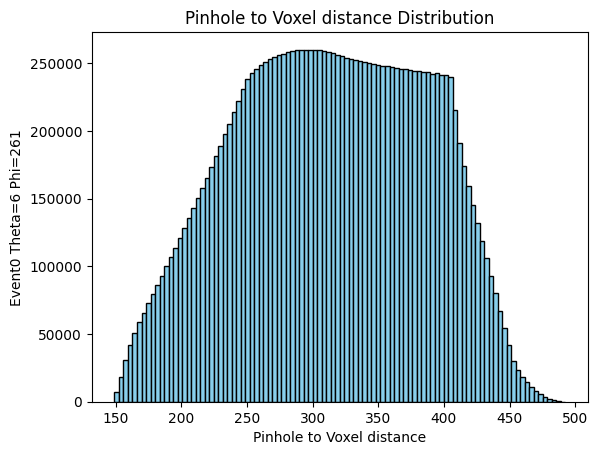

In [20]:
XC=xgrid-XP[0]
YC=ygrid-YP[0]
ZC=zgrid-ZP[0]
VecC=np.stack([XC,YC,ZC])
ic(VecC.shape)
VecR=np.linalg.norm(VecC,axis=0)
ic(VecR.shape)

plt.hist(VecR, bins=100, color='skyblue', edgecolor='black')

# Adding labels and title
plt.xlabel('Pinhole to Voxel distance')
plt.ylabel(f'Event{iEvent} Theta={ThetaDeg:.0f} Phi={PhiDeg:.0f}')
plt.title('Pinhole to Voxel distance Distribution')

# Display the plot
plt.show()

##Histogram distribution of distances from pinhole to voxel k-Plane

ic| VecCdotPV.shape: (3, 16777216)
ic| VecR.shape: (16777216,)


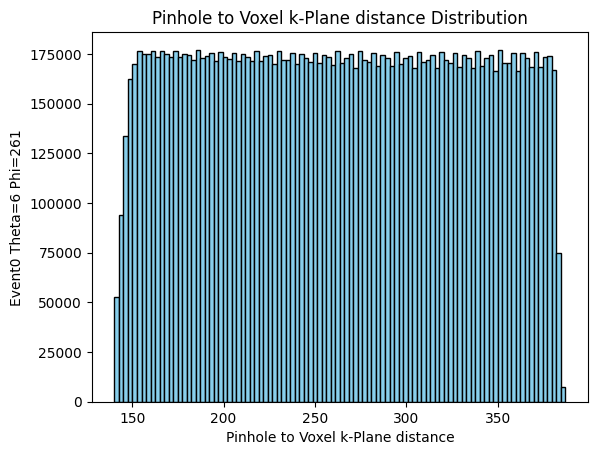

In [21]:
XC=xgrid-XP[0]
YC=ygrid-YP[0]
ZC=zgrid-ZP[0]
XCdotPV=XC*PRayX[0]
YCdotPV=YC*PRayY[0]
ZCdotPV=ZC*PRayZ[0]
VecCdotPV=np.stack([XCdotPV,YCdotPV,ZCdotPV])
ic(VecCdotPV.shape)
VecR=np.linalg.norm(VecCdotPV,axis=0)
ic(VecR.shape)

plt.hist(VecR, bins=100, color='skyblue', edgecolor='black')

# Adding labels and title
plt.xlabel('Pinhole to Voxel k-Plane distance')
plt.ylabel(f'Event{iEvent} Theta={ThetaDeg:.0f} Phi={PhiDeg:.0f}')
plt.title('Pinhole to Voxel k-Plane distance Distribution')

# Display the plot
plt.show()

##Histogram k-factors for reference length 250



ic| VecCdotPV.shape: (3, 16777216)
ic| VecR.shape: (16777216,)


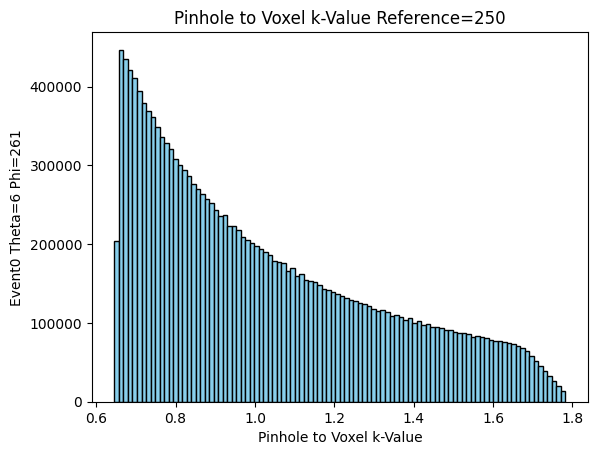

In [22]:
XC=xgrid-XP[0]
YC=ygrid-YP[0]
ZC=zgrid-ZP[0]
XCdotPV=XC*PRayX[0]
YCdotPV=YC*PRayY[0]
ZCdotPV=ZC*PRayZ[0]
VecCdotPV=np.stack([XCdotPV,YCdotPV,ZCdotPV])
ic(VecCdotPV.shape)
VecR=250./np.linalg.norm(VecCdotPV,axis=0)
ic(VecR.shape)

plt.hist(VecR, bins=100, color='skyblue', edgecolor='black')

# Adding labels and title
plt.xlabel('Pinhole to Voxel k-Value')
plt.ylabel(f'Event{iEvent} Theta={ThetaDeg:.0f} Phi={PhiDeg:.0f}')
plt.title('Pinhole to Voxel k-Value Reference=250')

# Display the plot
plt.show()

# Map from k-depth extended projection image 3D tensor to 3d volume

#Mount google drive and connect to output data path

In [23]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


Look around data area

In [24]:
!ls -ltr /content/gdrive/MyDrive/data/derenzo_phantom/truth_0.pt
!ls -ltr /content/gdrive/MyDrive/data/derenzo_phantom/Projections_0.pt
!ls -ltr /content/gdrive/MyDrive/data/derenzo_phantom/ProjRadon96_0.pt
!ls -ltr /content/gdrive/MyDrive/data/derenzo_phantom/ProjRadon256_0.pt
!ls -ltr /content/gdrive/MyDrive/data/derenzo_phantom/RunTranslate.npy
!ls -ltr /content/gdrive/MyDrive/data/derenzo_phantom/RunRotate.npy

-rw------- 1 root root 67110044 Feb  7 20:51 /content/gdrive/MyDrive/data/derenzo_phantom/truth_0.pt
-rw------- 1 root root 25167034 Feb  7 20:51 /content/gdrive/MyDrive/data/derenzo_phantom/Projections_0.pt
-rw------- 1 root root 35783866 Feb  7 20:51 /content/gdrive/MyDrive/data/derenzo_phantom/ProjRadon96_0.pt
-rw------- 1 root root 95421631 Feb  7 20:51 /content/gdrive/MyDrive/data/derenzo_phantom/ProjRadon256_0.pt
-rw------- 1 root root 152 Feb  7 20:52 /content/gdrive/MyDrive/data/derenzo_phantom/RunTranslate.npy
-rw------- 1 root root 152 Feb  7 20:52 /content/gdrive/MyDrive/data/derenzo_phantom/RunRotate.npy


#Load ground truth volumes and axially sum to get 2D orthogonal projection sums



ic| iEvent: 0
ic| thisTruth.shape: torch.Size([1, 256, 256, 256])
ic| Truth_ZSum.shape: (256, 256)
ic| Truth_ZSum.shape: (256, 256)


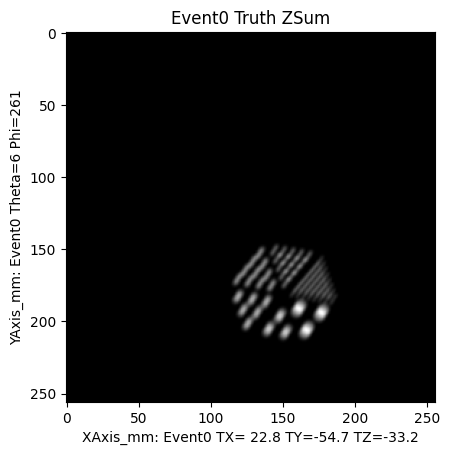

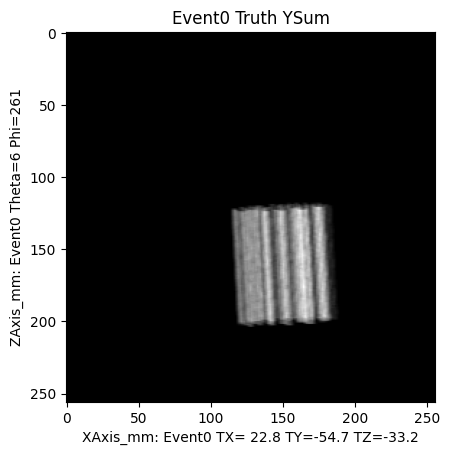

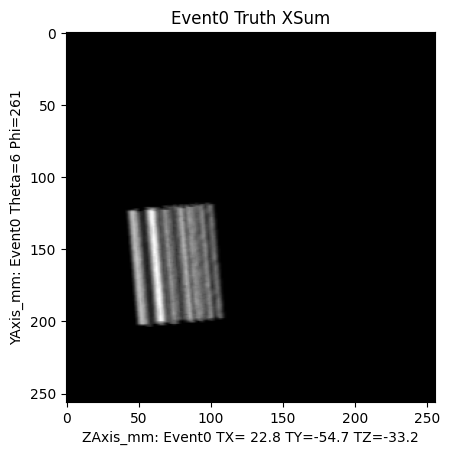

In [25]:
NRuns=1
NEvents=NRuns

for iEvent in range(0,NEvents):
  ic(iEvent)
  thisTruth=torch.load(f'/content/gdrive/MyDrive/data/derenzo_phantom/truth_{iEvent}.pt')
  ic(thisTruth.shape)
  #Truth_ZSum=np.sum(np.squeeze(thisTruth.numpy()),axis=2)
  #ic(Truth_ZSum.shape)
  #Truth_YSum=np.sum(np.squeeze(thisTruth.numpy()),axis=1)
  #Truth_XSum=np.sum(np.squeeze(thisTruth.numpy()),axis=0)
  #ic(Truth_ZSum.shape)
  Truth_ZSum=np.squeeze(torch.sum(thisTruth,dim=3).numpy())
  ic(Truth_ZSum.shape)
  Truth_YSum=np.squeeze(torch.sum(thisTruth,dim=1).numpy())
  Truth_XSum=np.squeeze(torch.sum(thisTruth,dim=2).numpy())
  ic(Truth_ZSum.shape)

  if (iEvent==0):
    TX=RunTranslate[iEvent,0]
    TY=RunTranslate[iEvent,1]
    TZ=RunTranslate[iEvent,2]
    PsiDeg=(180./np.pi)*RunRotate[iEvent,0]
    ThetaDeg=(180./np.pi)*RunRotate[iEvent,1]
    PhiDeg=(180./np.pi)*RunRotate[iEvent,2]

    plt.imshow(np.flipud(Truth_ZSum),cmap='gray')
    plt.title(f'Event{iEvent} Truth ZSum')
    plt.xlabel(f'XAxis_mm: Event{iEvent} TX={TX:5.1f} TY={TY:5.1f} TZ={TZ:5.1f}')
    plt.ylabel(f'YAxis_mm: Event{iEvent} Theta={ThetaDeg:.0f} Phi={PhiDeg:.0f}')
    plt.show()

    plt.imshow(np.flipud(Truth_YSum.T),cmap='gray')
    plt.title(f'Event{iEvent} Truth YSum')
    plt.xlabel(f'XAxis_mm: Event{iEvent} TX={TX:5.1f} TY={TY:5.1f} TZ={TZ:5.1f}')
    plt.ylabel(f'ZAxis_mm: Event{iEvent} Theta={ThetaDeg:.0f} Phi={PhiDeg:.0f}')
    plt.show()

    plt.imshow(np.flipud(Truth_XSum.T),cmap='gray')
    plt.title(f'Event{iEvent} Truth XSum')
    plt.xlabel(f'ZAxis_mm: Event{iEvent} TX={TX:5.1f} TY={TY:5.1f} TZ={TZ:5.1f}')
    plt.ylabel(f'YAxis_mm: Event{iEvent} Theta={ThetaDeg:.0f} Phi={PhiDeg:.0f}')
    plt.show()

In [26]:
#volume, spacing = load_example_ct()
volume=np.zeros([256,256,256])
spacing=[1.0, 1.0, 1.0]
bx, by, bz = torch.tensor(volume.shape) * torch.tensor(spacing) / 2
ic(bx, by, bz)
ic(volume.shape)
ic(spacing)

ic| bx: tensor(128.), by: tensor(128.), bz: tensor(128.)
ic| volume.shape: (256, 256, 256)
ic| spacing: [1.0, 1.0, 1.0]


[1.0, 1.0, 1.0]

#Get homogeneous coordinates grid for this module
---



##Make Displays of orthogonal projection of phantom expressed as 3D homogeneous coordinate volumetric array

ic| PRayX: array([-0.94136013, -0.88433121, -0.79431321, -0.66608246, -0.49573393,
                  -0.28378971, -0.03857505,  0.22332015,  0.4701524 ,  0.67191658,
                   0.81916868,  0.91088331,  0.95120547,  0.946014  ,  0.90079516,
                   0.81997713,  0.70788394,  0.56952242,  0.41104384,  0.23963632,
                  -0.96597345, -0.91120465, -0.8231305 , -0.69534791, -0.52207243,
                  -0.3015706 , -0.041289  ,  0.23978003,  0.50371891,  0.7155444 ,
                   0.86581734,  0.95598988,  0.99275209,  0.98352604,  0.93425195,
                   0.84928766,  0.73268328,  0.58922754,  0.4250641 ,  0.24762417,
                  -0.96597345, -0.91120465, -0.8231305 , -0.69534791, -0.52207243,
                  -0.3015706 , -0.041289  ,  0.23978003,  0.50371891,  0.7155444 ,
                   0.86581734,  0.95598988,  0.99275209,  0.98352604,  0.93425195,
                   0.84928766,  0.73268328,  0.58922754,  0.4250641 ,  0.24762417,
    

Pinhole X=277.002,Y=70.37124,Z=-70.0363
Pinhole_to_PhantomCentroid=(-254.2,-125.1, 36.9)
Module 0 Principal Ray KX=-0.9413601271912979,KY=-0.23914874057591406,KZ=0.2380104846752294
Module 0 U Ray UX=0.23914874057591406,UY=-0.9413601271912979,UZ=0.0
Module 0 V Ray VX=0.2240535801267364,VY=0.056919907653944,VZ=0.9433510091846624


ic| iXProj.dtype: dtype('int64')
ic| iYProj.dtype: dtype('int64')
ic| iZProj.dtype: dtype('int64')
ic| Mod0Index.dtype: dtype('int64')
ic| Mod0Index.shape: (16777216,)
ic| Mod0ProjSumU.shape: (256, 256)
ic| Mod0ProjSumV.shape: (256, 256)
ic| Mod0ProjSumK.shape: (256, 256)
ic| minX: 41
ic| maxX: 104
ic| minY: 114
ic| maxY: 183
ic| minZ: 120
ic| maxZ: 135


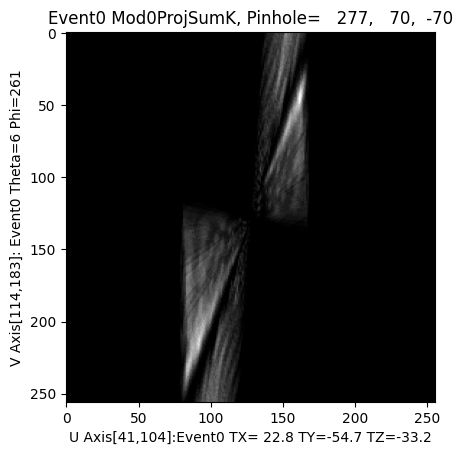

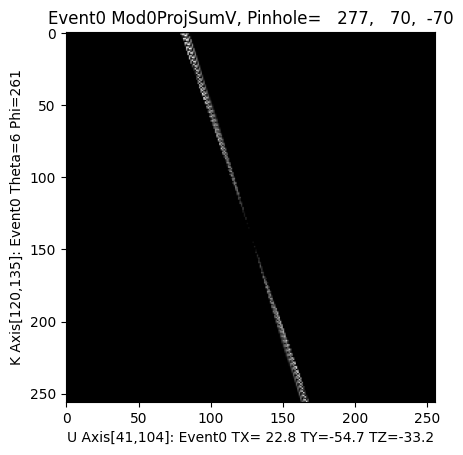

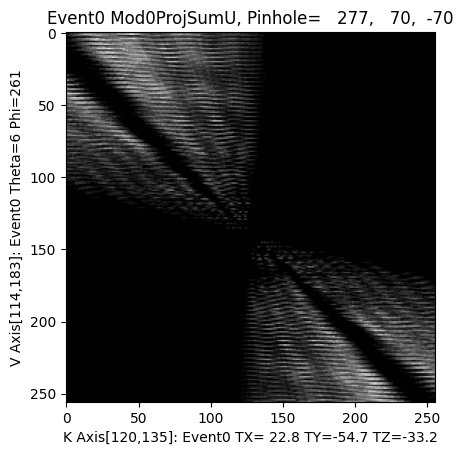

In [32]:
ReferenceLength=250

#PRayR=np.linalg.norm(PRayVec,axis=0)
#PRayX=np.divide(-XP,PRayR)
#PRayY=np.divide(-YP,PRayR)
#PRayZ=np.divide(-ZP,PRayR)
ic(PRayX)

uProjlinspace=np.linspace(-128*spacing[0], 128*spacing[0], 256)
vProjlinspace=np.linspace(-128*spacing[1], 128*spacing[1], 256)
kProjlinspace=ReferenceLength*np.linspace(0.5, 2.0, 256)

uProj,vProj,kProj = np.meshgrid(uProjlinspace, vProjlinspace,kProjlinspace)
uProj=uProj.flatten()
vProj=vProj.flatten()
kProj=kProj.flatten()
uProj0=0.
vProj0=0.

ReferenceLength=250
kProj0=1.

print(f'Pinhole X={XP[0]},Y={YP[0]},Z={ZP[0]}')

# Find Vector from Pinhole to centroid of derenzo_phantom (given by translation)
#
Mod0_PC_X=TX-XP[0]
Mod0_PC_Y=TY-YP[0]
Mod0_PC_Z=TZ-ZP[0]
print(f'Pinhole_to_PhantomCentroid=({Mod0_PC_X:5.1f},{Mod0_PC_Y:5.1f},{Mod0_PC_Z:5.1f})')

KX=PRayX[0]
KY=PRayY[0]
KZ=PRayZ[0]
print(f'Module 0 Principal Ray KX={KX},KY={KY},KZ={KZ}')

UX=-PRayY[0]
UY=PRayX[0]
UZ=0.
print(f'Module 0 U Ray UX={UX},UY={UY},UZ={UZ}')

VX=KY*UZ-KZ*UY
VY=KZ*UX-KX*UZ
VZ=KX*UY-KY*UX
print(f'Module 0 V Ray VX={VX},VY={VY},VZ={VZ}')

ZProj=ZP[0]+uProj*UZ+vProj*VZ+kProj*KZ
HalfZ=128*spacing[2]
iZProj=np.floor((HalfZ+ZProj)/spacing[2]).astype(int)
iZProj=np.where(iZProj>=0,iZProj,0).astype(int)
iZProj=np.where(iZProj<256,iZProj,255) .astype(int)

XProj=np.divide(XP[0]+uProj*UX+vProj*VX+kProj*KX,ZProj)
HalfX=128*spacing[0]
iXProj=np.floor((HalfX+XProj)/spacing[0]).astype(int)
iXProj=np.where(iXProj>=0,iXProj,0).astype(int)
iXProj=np.where(iXProj<256,iXProj,255).astype(int)

YProj=np.divide(YP[0]+uProj*UY+vProj*VY+kProj*KY,ZProj)
HalfY=128*spacing[1]
iYProj=np.floor((HalfY+YProj)/spacing[1]).astype(int)
iYProj=np.where(iYProj>=0,iYProj,0).astype(int)
iYProj=np.where(iYProj<256,iYProj,255).astype(int)

Mod0Projection=np.zeros([256,256,256])
ic(iXProj.dtype)
ic(iYProj.dtype)
ic(iZProj.dtype)
Mod0Index=(iZProj+256*(iYProj+256*iXProj))
ic(Mod0Index.dtype)
ic(Mod0Index.shape)
Truth=Truth.flatten()
Mod0Projection=Truth[Mod0Index]
Mod0Projection=Mod0Projection.reshape([256,256,256])
Mod0ProjSumU=np.sum(Mod0Projection,axis=0)
Mod0ProjSumV=np.sum(Mod0Projection,axis=1)
Mod0ProjSumK=np.sum(Mod0Projection,axis=2)
ic(Mod0ProjSumU.shape)
ic(Mod0ProjSumV.shape)
ic(Mod0ProjSumK.shape)

Thresh=0.1*max(Truth.flatten())
minX=min(np.where(Truth[Mod0Index]>Thresh,iXProj,255)).astype(int)
ic(minX)
maxX=max(np.where(Truth[Mod0Index]>Thresh,iXProj,0)).astype(int)
ic(maxX)
minY=min(np.where(Truth[Mod0Index]>Thresh,iYProj,255)).astype(int)
ic(minY)
maxY=max(np.where(Truth[Mod0Index]>Thresh,iYProj,0)).astype(int)
ic(maxY)
minZ=min(np.where(Truth[Mod0Index]>Thresh,iZProj,255)).astype(int)
ic(minZ)
maxZ=max(np.where(Truth[Mod0Index]>Thresh,iZProj,0)).astype(int)
ic(maxZ)

plt.imshow(np.flipud(Mod0ProjSumK.T),cmap='gray')
plt.title(f'Event{iEvent} Mod0ProjSumK, Pinhole= {XP[0]:5.0f},{YP[0]:5.0f},{ZP[0]:5.0f}')
plt.xlabel(f'U Axis[{minX},{maxX}]:Event{iEvent} TX={TX:5.1f} TY={TY:5.1f} TZ={TZ:5.1f}')
plt.ylabel(f'V Axis[{minY},{maxY}]: Event{iEvent} Theta={ThetaDeg:.0f} Phi={PhiDeg:.0f}')
plt.show()

plt.imshow(np.flipud(Mod0ProjSumV.T),cmap='gray')
plt.title(f'Event{iEvent} Mod0ProjSumV, Pinhole= {XP[0]:5.0f},{YP[0]:5.0f},{ZP[0]:5.0f}')
plt.xlabel(f'U Axis[{minX},{maxX}]: Event{iEvent} TX={TX:5.1f} TY={TY:5.1f} TZ={TZ:5.1f}')
plt.ylabel(f'K Axis[{minZ},{maxZ}]: Event{iEvent} Theta={ThetaDeg:.0f} Phi={PhiDeg:.0f}')
plt.show()

plt.imshow(np.flipud(Mod0ProjSumU.T),cmap='gray')
plt.title(f'Event{iEvent} Mod0ProjSumU, Pinhole= {XP[0]:5.0f},{YP[0]:5.0f},{ZP[0]:5.0f}')
plt.xlabel(f'K Axis[{minZ},{maxZ}]: Event{iEvent} TX={TX:5.1f} TY={TY:5.1f} TZ={TZ:5.1f}')
plt.ylabel(f'V Axis[{minY},{maxY}]: Event{iEvent} Theta={ThetaDeg:.0f} Phi={PhiDeg:.0f}')
plt.show()

XPara=XP[0]+np.multiply(uProj,kProj)*UX+np.multiply(vProj,kProj)*VX+kProj*KX
YPara=XP[0]+np.multiply(uProj,kProj)*UY+np.multiply(vProj,kProj)*VY+kProj*KY
ZPara=XP[0]+np.multiply(uProj,kProj)*UZ+np.multiply(vProj,kProj)*VZ+kProj*KZ

In [ ]:
ReferenceLength=250

#PRayR=np.linalg.norm(PRayVec,axis=0)
#PRayX=np.divide(-XP,PRayR)
#PRayY=np.divide(-YP,PRayR)
#PRayZ=np.divide(-ZP,PRayR)
ic(PRayX)

uProjlinspace=np.linspace(-128*spacing[0], 128*spacing[0], 256)
vProjlinspace=np.linspace(-128*spacing[1], 128*spacing[1], 256)
kProjlinspace=ReferenceLength*np.linspace(0.5, 2.0, 256)

uProj,vProj,kProj = np.meshgrid(uProjlinspace, vProjlinspace,kProjlinspace)
uProj=uProj.flatten()
vProj=vProj.flatten()
kProj=kProj.flatten()
uProj0=0.
vProj0=0.

ReferenceLength=250
kProj0=1.

print(f'Pinhole X={XP[0]},Y={YP[0]},Z={ZP[0]}')

# Find Vector from Pinhole to centroid of derenzo_phantom (given by translation)
#
Mod0_PC_X=TX-XP[0]
Mod0_PC_Y=TY-YP[0]
Mod0_PC_Z=TZ-ZP[0]
print(f'Pinhole_to_PhantomCentroid=({Mod0_PC_X:5.1f},{Mod0_PC_Y:5.1f},{Mod0_PC_Z:5.1f})')

KX=PRayX[0]
KY=PRayY[0]
KZ=PRayZ[0]
print(f'Module 0 Principal Ray KX={KX},KY={KY},KZ={KZ}')

UX=-PRayY[0]
UY=PRayX[0]
UZ=0.
print(f'Module 0 U Ray UX={UX},UY={UY},UZ={UZ}')

VX=KY*UZ-KZ*UY
VY=KZ*UX-KX*UZ
VZ=KX*UY-KY*UX
print(f'Module 0 V Ray VX={VX},VY={VY},VZ={VZ}')

XProj=XP[0]+uProj*UX+vProj*VX+kProj*KX
XProj0=XP[0]+uProj0*UX+vProj0*VX+kProj0*KX

HalfX=128*spacing[0]
iXProj=np.floor((HalfX+XProj)/spacing[0]).astype(int)
iXProj=np.where(iXProj>=0,iXProj,0).astype(int)
iXProj=np.where(iXProj<256,iXProj,255).astype(int)

YProj=YP[0]+uProj*UY+vProj*VY+(kProj*KY)
HalfY=128*spacing[1]
iYProj=np.floor((HalfY+YProj)/spacing[1]).astype(int)
iYProj=np.where(iYProj>=0,iYProj,0).astype(int)
iYProj=np.where(iYProj<256,iYProj,255).astype(int)

ZProj=ZP[0]+uProj*UZ+vProj*VZ+kProj*KZ
HalfZ=128*spacing[2]
iZProj=np.floor((HalfZ+ZProj)/spacing[2]).astype(int)
iZProj=np.where(iZProj>=0,iZProj,0).astype(int)
iZProj=np.where(iZProj<256,iZProj,255) .astype(int)
Mod0Projection=np.zeros([256,256,256])
ic(iXProj.dtype)
ic(iYProj.dtype)
ic(iZProj.dtype)
Mod0Index=(iZProj+256*(iYProj+256*iXProj))
ic(Mod0Index.dtype)
ic(Mod0Index.shape)
Truth=Truth.flatten()
Mod0Projection=Truth[Mod0Index]
Mod0Projection=Mod0Projection.reshape([256,256,256])
Mod0ProjSumU=np.sum(Mod0Projection,axis=0)
Mod0ProjSumV=np.sum(Mod0Projection,axis=1)
Mod0ProjSumK=np.sum(Mod0Projection,axis=2)
ic(Mod0ProjSumU.shape)
ic(Mod0ProjSumV.shape)
ic(Mod0ProjSumK.shape)

Thresh=0.1*max(Truth.flatten())
minX=min(np.where(Truth[Mod0Index]>Thresh,iXProj,255)).astype(int)
ic(minX)
maxX=max(np.where(Truth[Mod0Index]>Thresh,iXProj,0)).astype(int)
ic(maxX)
minY=min(np.where(Truth[Mod0Index]>Thresh,iYProj,255)).astype(int)
ic(minY)
maxY=max(np.where(Truth[Mod0Index]>Thresh,iYProj,0)).astype(int)
ic(maxY)
minZ=min(np.where(Truth[Mod0Index]>Thresh,iZProj,255)).astype(int)
ic(minZ)
maxZ=max(np.where(Truth[Mod0Index]>Thresh,iZProj,0)).astype(int)
ic(maxZ)

plt.imshow(np.flipud(Mod0ProjSumK.T),cmap='gray')
plt.title(f'Event{iEvent} Mod0ProjSumK, Pinhole= {XP[0]:5.0f},{YP[0]:5.0f},{ZP[0]:5.0f}')
plt.xlabel(f'U Axis[{minX},{maxX}]:Event{iEvent} TX={TX:5.1f} TY={TY:5.1f} TZ={TZ:5.1f}')
plt.ylabel(f'V Axis[{minY},{maxY}]: Event{iEvent} Theta={ThetaDeg:.0f} Phi={PhiDeg:.0f}')
plt.show()

plt.imshow(np.flipud(Mod0ProjSumV.T),cmap='gray')
plt.title(f'Event{iEvent} Mod0ProjSumV, Pinhole= {XP[0]:5.0f},{YP[0]:5.0f},{ZP[0]:5.0f}')
plt.xlabel(f'U Axis[{minX},{maxX}]: Event{iEvent} TX={TX:5.1f} TY={TY:5.1f} TZ={TZ:5.1f}')
plt.ylabel(f'K Axis[{minZ},{maxZ}]: Event{iEvent} Theta={ThetaDeg:.0f} Phi={PhiDeg:.0f}')
plt.show()

plt.imshow(np.flipud(Mod0ProjSumU.T),cmap='gray')
plt.title(f'Event{iEvent} Mod0ProjSumU, Pinhole= {XP[0]:5.0f},{YP[0]:5.0f},{ZP[0]:5.0f}')
plt.xlabel(f'K Axis[{minZ},{maxZ}]: Event{iEvent} TX={TX:5.1f} TY={TY:5.1f} TZ={TZ:5.1f}')
plt.ylabel(f'V Axis[{minY},{maxY}]: Event{iEvent} Theta={ThetaDeg:.0f} Phi={PhiDeg:.0f}')
plt.show()

XPara=XP[0]+np.multiply(uProj,kProj)*UX+np.multiply(vProj,kProj)*VX+kProj*KX
YPara=XP[0]+np.multiply(uProj,kProj)*UY+np.multiply(vProj,kProj)*VY+kProj*KY
ZPara=XP[0]+np.multiply(uProj,kProj)*UZ+np.multiply(vProj,kProj)*VZ+kProj*KZ

In [ ]:
ReferenceLength=250

uProjlinspace=np.linspace(-128*spacing[0], 128*spacing[0], 256)
vProjlinspace=np.linspace(-128*spacing[1], 128*spacing[1], 256)
kProjlinspace=ReferenceLength*np.linspace(0.5, 2.0, 256)

uProj,vProj,kProj = np.meshgrid(uProjlinspace, vProjlinspace,kProjlinspace)
uProj=uProj.flatten()
vProj=vProj.flatten()
kProj=kProj.flatten()
uProj0=0.
vProj0=0.

ReferenceLength=250
kProj0=1.

print(f'Pinhole X={XP[0]},Y={YP[0]},Z={ZP[0]}')

KX=PRayX[0]
KY=PRayY[0]
KZ=PRayZ[0]
print(f'Module 0 Principal Ray KX={KX},KY={KY},KZ={KZ}')

UX=-PRayY[0]
UY=PRayX[0]
UZ=0.
print(f'Module 0 U Ray UX={UX},UY={UY},UZ={UZ}')

VX=KY*UZ-KZ*UY
VY=KZ*UX-KX*UZ
VZ=KX*UY-KY*UX
print(f'Module 0 V Ray VX={VX},VY={VY},VZ={VZ}')

XProj=XP[0]+uProj*UX+vProj*VX+kProj*KX
XProj0=XP[0]+uProj0*UX+vProj0*VX+kProj0*KX

HalfX=128*spacing[0]
iXProj=np.floor((HalfX+XProj)/spacing[0]).astype(int)
iXProj=np.where(iXProj>=0,iXProj,0).astype(int)
iXProj=np.where(iXProj<256,iXProj,255).astype(int)
YProj=YP[0]+uProj*UY+vProj*VY+(kProj*KY)
HalfY=128*spacing[1]
iYProj=np.floor((HalfY+YProj)/spacing[1]).astype(int)
iYProj=np.where(iYProj>=0,iYProj,0).astype(int)
iYProj=np.where(iYProj<256,iYProj,255).astype(int)
ZProj=ZP[0]+uProj*UZ+vProj*VZ+kProj*KZ
HalfZ=128*spacing[2]
iZProj=np.floor((HalfZ+ZProj)/spacing[2]).astype(int)
iZProj=np.where(iZProj>=0,iZProj,0).astype(int)
iZProj=np.where(iZProj<256,iZProj,255) .astype(int)
Mod0Projection=np.zeros([256,256,256])
ic(iXProj.dtype)
ic(iYProj.dtype)
ic(iZProj.dtype)
Mod0Index=(iZProj+256*(iYProj+256*iXProj))
ic(Mod0Index.dtype)
ic(Mod0Index.shape)
Truth=Truth.flatten()
Mod0Projection=Truth[Mod0Index]
Mod0Projection=Mod0Projection.reshape([256,256,256])

for iU in range(50,130,10):
  Mod0ProjU=np.squeeze(Mod0Projection[iU,:,:])
  ic(Mod0ProjU.shape)
  plt.imshow(np.flipud(Mod0ProjU.T),cmap='gray')
  plt.title(f'Event{iEvent} Mod0ProjU={iU}, Pinhole= {XP[0]:5.0f},{XP[1]:5.0f},{XP[2]:5.0f}')
  plt.xlabel(f'U Axis[{minX},{maxX}]:Event{iEvent} TX={TX:5.1f} TY={TY:5.1f} TZ={TZ:5.1f}')
  plt.ylabel(f'V Axis[{minY},{maxY}]: Event{iEvent} Theta={ThetaDeg:.0f} Phi={PhiDeg:.0f}')
  plt.show()

for iV in range(60,110,10):
  Mod0ProjV=np.squeeze(Mod0Projection[:,iV,:])
  ic(Mod0ProjV.shape)
  plt.imshow(np.flipud(Mod0ProjV.T),cmap='gray')
  plt.title(f'Event{iEvent} Mod0ProjV={iV}, Pinhole= {XP[0]:5.0f},{XP[1]:5.0f},{XP[2]:5.0f}')
  plt.xlabel(f'U Axis[{minX},{maxX}]:Event{iEvent} TX={TX:5.1f} TY={TY:5.1f} TZ={TZ:5.1f}')
  plt.ylabel(f'K Axis[{minZ},{maxZ}]: Event{iEvent} Theta={ThetaDeg:.0f} Phi={PhiDeg:.0f}')
  plt.show()

for iK in range(145,170,5):
  Mod0ProjK=np.squeeze(Mod0Projection[:,:,iK])
  ic(Mod0ProjK.shape)
  plt.imshow(np.flipud(Mod0ProjK.T),cmap='gray')
  plt.title(f'Event{iEvent} Mod0ProjK={iK}, Pinhole= {XP[0]:5.0f},{XP[1]:5.0f},{XP[2]:5.0f}')
  plt.xlabel(f'K Axis[{minZ},{maxZ}]:Event{iEvent} TX={TX:5.1f} TY={TY:5.1f} TZ={TZ:5.1f}')
  plt.ylabel(f'V Axis[{minY},{maxY}]: Event{iEvent} Theta={ThetaDeg:.0f} Phi={PhiDeg:.0f}')
  plt.show()


## Compare vs diffDRR projections for same module, same event


In [ ]:
NRuns=1
NEvents=NRuns

Projections_2DZSum=torch.zeros(1,NRuns,96,256)
ProjRadon256_2DZSum=torch.zeros(1,NRuns,256,256)
ProjRadon96_2DZSum=torch.zeros(1,NRuns,96,256)

for iEvent in range(0,NEvents):
  ic(iEvent)
  thisProjections=torch.load(f'/content/gdrive/MyDrive/data/derenzo_phantom/Projections_{iEvent}.pt')
  ic(thisProjections.shape)
  Projection0=np.squeeze(thisProjections[:,0,:,:].numpy())

  plt.imshow(np.flipud(Projection0.T),cmap='gray')
  plt.title(f'Event{iEvent} Mod0 diffDRR, Pinhole= {XP[0]:5.0f},{XP[1]:5.0f},{XP[2]:5.0f}')
  plt.xlabel(f'U Axis:Event{iEvent} TX={TX:5.1f} TY={TY:5.1f} TZ={TZ:5.1f}')
  plt.ylabel(f'V Axis: Event{iEvent} Theta={ThetaDeg:.0f} Phi={PhiDeg:.0f}')
  plt.show()
